In [3]:
#%matplotlib inline

import pylab

import json
import os
import pandas as pd
import re
import numpy as np

import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-white')

pylab.ion()

<h1> Read Results </h1>

Read the csv file with with all the bibliographical informations regarding the various authors. Show the first ten authors ordered by their PageRank85.

In [28]:
df_authors= pd.read_csv('results_authors', index_col=0)

In [30]:
df_authors.sort_values(['pagerank85','lastname'], ascending=[0, 0]).head(10)

,authorID,n_papers,name,lastname,year0,cites,cites_N,pagerank85,pagerank50,H_index
9630,1041414,128,"Azizi, Kazem",Azizi,2006,1208,521.850000,104.652424,117.108098,18
8610,1045921,124,"Spannowsky, Michael",Spannowsky,2006,6010,1395.422665,102.081848,95.074786,44
9042,1056063,83,"Staub, Florian",Staub,2008,3990,1922.604386,97.311618,91.819325,37
4830,1057171,58,"Hinterbichler, Kurt",Hinterbichler,2008,2624,1327.750000,91.506066,74.650743,27
3258,1034792,61,"Sheykhi, Ahmad",Sheykhi,2006,1918,1196.916667,88.350345,89.543190,27
8459,1032756,60,"Lorce, Cedric",Lorce,2006,1162,664.392857,88.214732,92.453582,21
6539,1040458,57,"Pufu, Silviu S.",Pufu,2006,3399,1096.566667,86.252086,66.617803,33
1980,1024768,14,"Ryu, Shinsei",Ryu,2006,3014,1350.750000,85.614160,54.456067,13
2717,1030755,66,"Kopp, Joachim",Kopp,2006,4636,1103.874298,85.271514,72.306651,31
7533,1058529,37,"Re, Emanuele",Re,2008,4414,1345.464034,82.415580,60.935602,24


<h1> Few plots </h1>

These plots show the distribution of the classical bibliographical indices: number of papers, total citations, normalized citations and h-index.

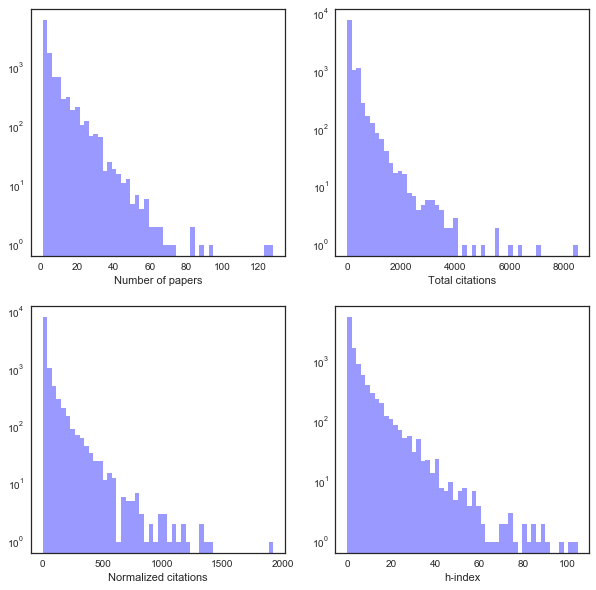

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(221)
g=sns.distplot(df_authors['n_papers'], kde=False,color="Blue");
g.set_yscale('log')
plt.xlabel('Number of papers')
plt.subplot(222)
g=sns.distplot(df_authors['cites'], kde=False,color="Blue");
g.set_yscale('log')
plt.xlabel('Total citations')
plt.subplot(223)
g=sns.distplot(df_authors['cites_N'], kde=False,color="Blue");
g.set_yscale('log')
plt.xlabel('Normalized citations')
plt.subplot(224)
g=sns.distplot(df_authors['pagerank85'], kde=False,color="Blue");
plt.xlabel('h-index')
g.set_yscale('log')
plt.show()

This will show the correlation between PageRank, either 85 (black) or 50 (blue), and the classical bibliographical indices.

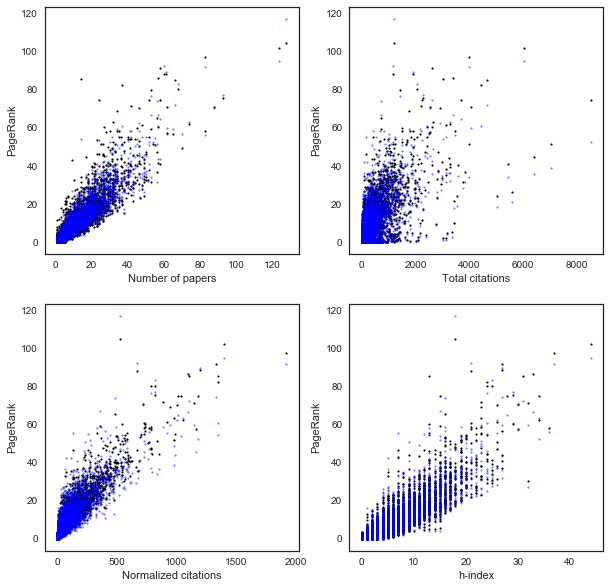

In [7]:
pg85_list=df_authors['pagerank85'].tolist()
pg50_list=df_authors['pagerank50'].tolist()
np_list=df_authors['n_papers'].tolist()
cites_list=df_authors['cites'].tolist()
citesN_list=df_authors['cites_N'].tolist()
hindex_list=df_authors['H_index'].tolist()

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.scatter(np_list,pg85_list, s=3, c='Black', alpha=1)
plt.scatter(np_list,pg50_list, s=3, c='Blue', alpha=0.5)
plt.xlabel('Number of papers')
plt.ylabel('PageRank')
plt.subplot(222)
plt.scatter(cites_list,pg85_list, s=3, c='Black', alpha=1)
plt.scatter(cites_list,pg50_list, s=3, c='Blue', alpha=0.5)
plt.xlabel('Total citations')
plt.ylabel('PageRank')
plt.subplot(223)
plt.scatter(citesN_list,pg85_list, s=3, c='Black', alpha=1)
plt.scatter(citesN_list,pg50_list, s=3, c='Blue', alpha=0.5)
plt.xlabel('Normalized citations')
plt.ylabel('PageRank')
plt.subplot(224)
plt.scatter(hindex_list,pg85_list, s=3, c='Black', alpha=1)
plt.scatter(hindex_list,pg50_list, s=3, c='Blue', alpha=0.5)
plt.xlabel('h-index')
plt.ylabel('PageRank')
plt.savefig('corr.png', bbox_inches='tight')